## Let's grow More (LGMVIP)


## Task 1--Iris Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=sns.load_dataset("iris")

In [3]:
df.head()# first five rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()# last 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.isnull().sum()# checking null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()# five point summary

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Univariate Analysis

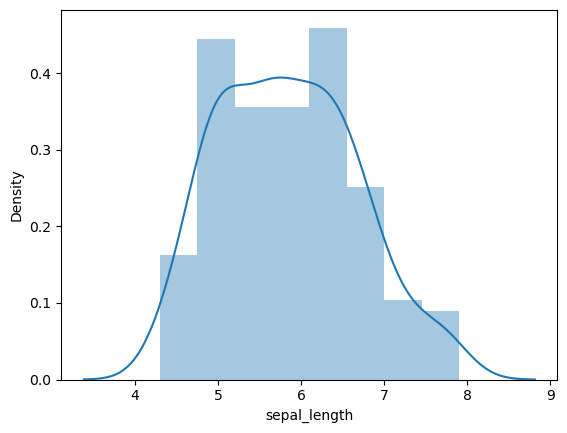

In [8]:
sns.distplot(df.sepal_length)
plt.show()

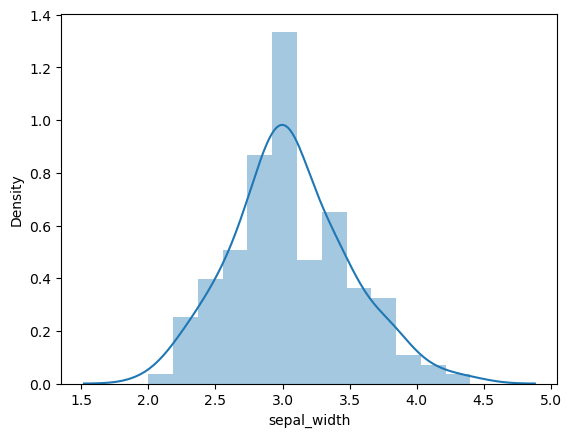

In [9]:
sns.distplot(df.sepal_width)
plt.show()

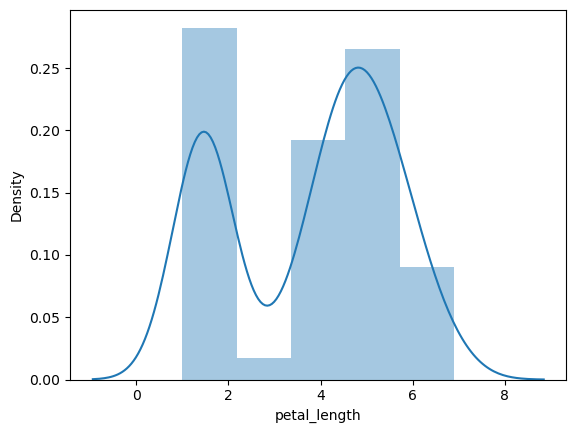

In [10]:
sns.distplot(df.petal_length)
plt.show()

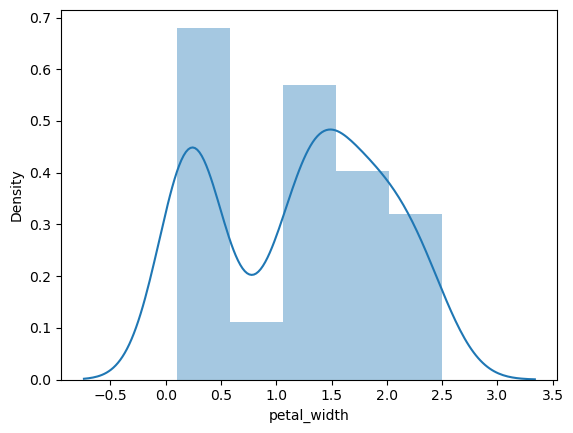

In [11]:
sns.distplot(df.petal_width)
plt.show()

<AxesSubplot:xlabel='species', ylabel='count'>

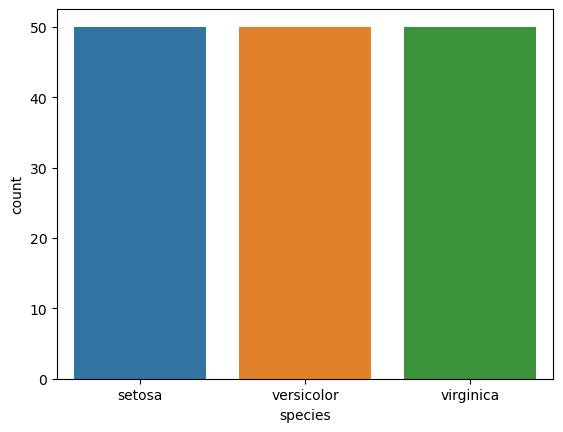

In [12]:
sns.countplot(x="species",data=df)

# Bivariate Analysis

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

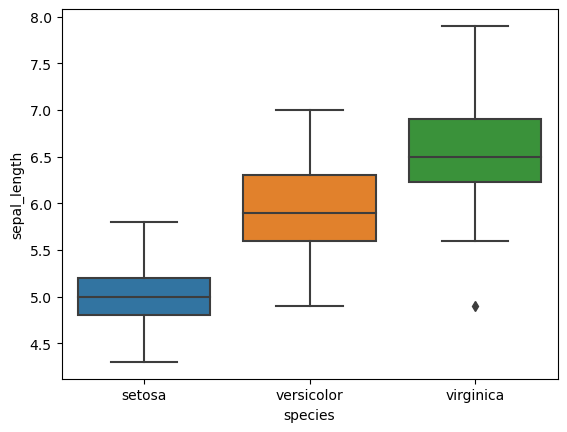

In [13]:
sns.boxplot(data=df,x='species',y='sepal_length')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

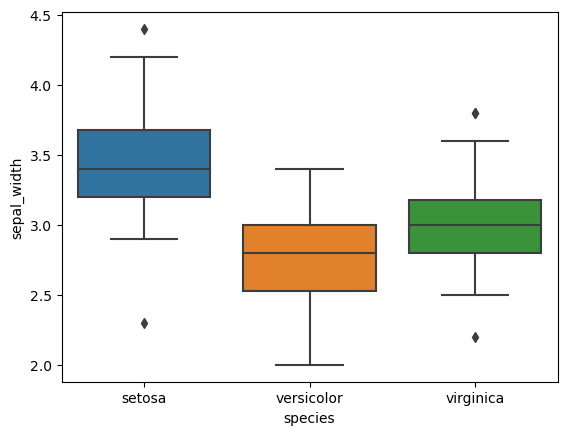

In [14]:
sns.boxplot(x="species",y='sepal_width',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

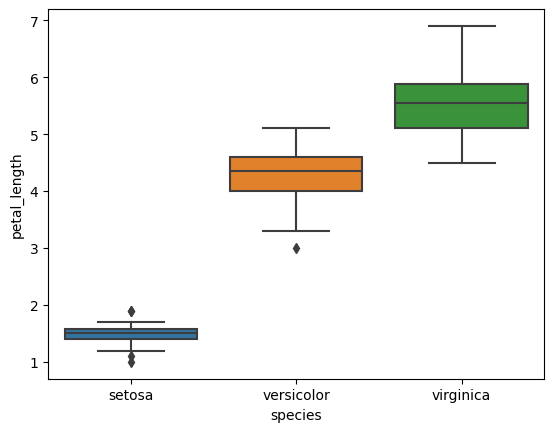

In [15]:
sns.boxplot(x="species",y="petal_length",data=df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

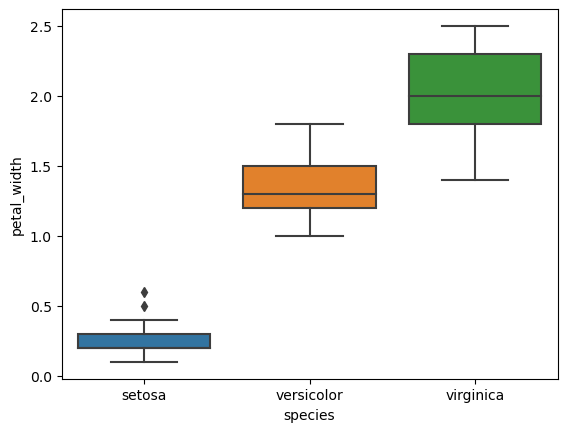

In [16]:
sns.boxplot(x="species",y="petal_width",data=df)

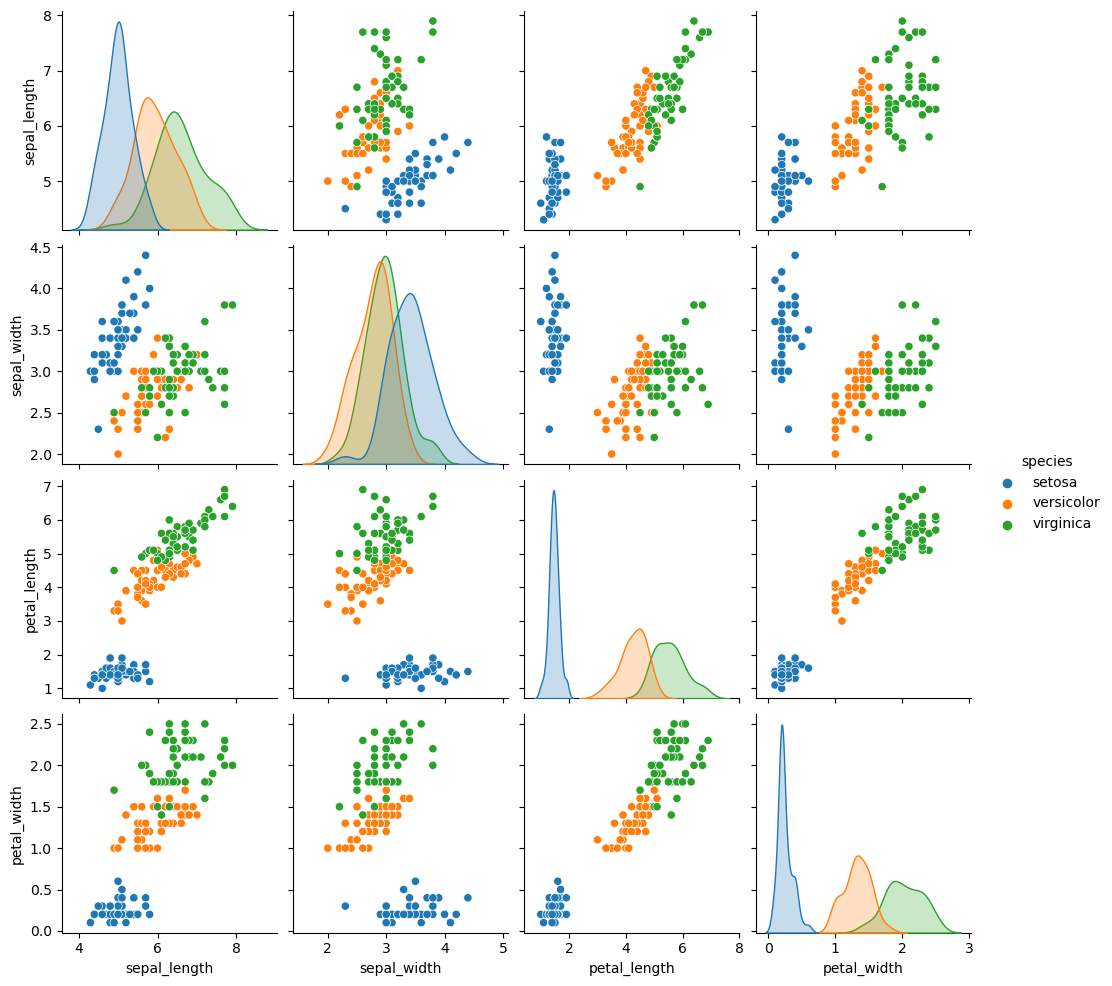

In [17]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

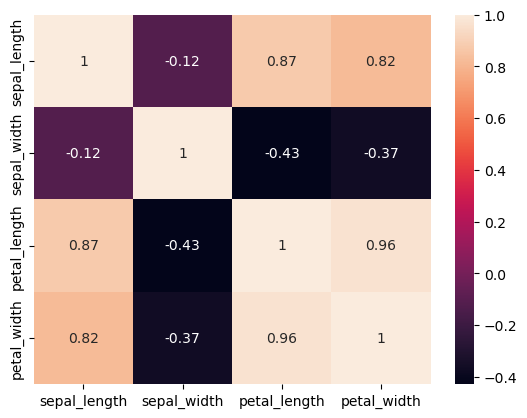

In [18]:
sns.heatmap(df.corr(),annot=True)

# Data Separation

In [19]:
x=df.iloc[:,0:4] # picking independent variable
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y=df.iloc[:,4]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [22]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [23]:
y_train.shape,y_test.shape

((120,), (30,))

## KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
knn=KNeighborsClassifier(n_neighbors=7)
knn
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

## Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## Accuracy

In [27]:
a=accuracy_score(y_test,y_pred)
print(a)

0.9666666666666667


## Confusion Matrix

[[ 6  0  0]
 [ 0 10  0]
 [ 0  1 13]]


<function matplotlib.pyplot.show(close=None, block=None)>

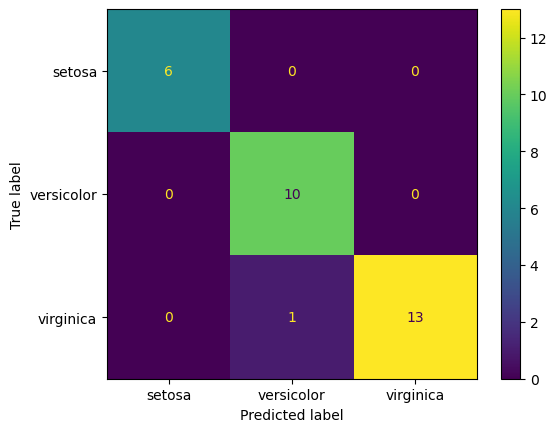

In [28]:
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test,y_pred)
print(c_m)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,x_test,y_test)
plt.show

## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
#creating random forest classifier
rfc=RandomForestClassifier(n_estimators=10) #By deafault Tress=100
rfc

RandomForestClassifier(n_estimators=10)

In [30]:
#training the classifier
rfc.fit(x_train,y_train)
#applying the trained classifier to the test
y_pred=rfc.predict(x_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor'], dtype=object)

## Accuracy

In [31]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
a
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
a

0.8666666666666667

## confusion matrix

[[ 6  0  0]
 [ 0 10  0]
 [ 0  4 10]]


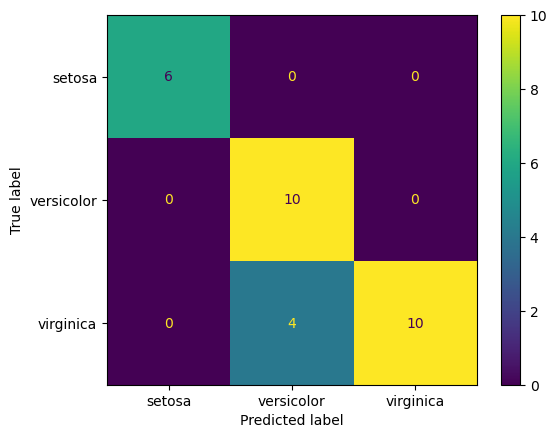

In [32]:
from sklearn.metrics import  confusion_matrix
c_m=confusion_matrix(y_test,y_pred)
print(c_m)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,x_test,y_test)
plt.show()

## Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.71      1.00      0.83        10
   virginica       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.89        30
weighted avg       0.90      0.87      0.87        30



## Conclusion

#### I have Performed Iris Flower Classification using two classifiers namely Random Forest Classifier And Knn Classifier. 
#### Accuracy of Random Forest Classifier is 86%.
#### Accuracy of Knn Classifieris 96%.
#### Hence we conclude that KNN Classifier is better for classification of iris Flower

# Thank You!